## Importing the libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset

In [2]:
dataset = pd.read_csv('D:/Code/ML_AI_Course/Assignments/Assignment 8/Country-data.csv')

In [3]:
X = dataset.iloc[:, 1:].values

## Scaling the data

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Now we have to find the optimal number of clusters for our model


## First we use the Elbow Method

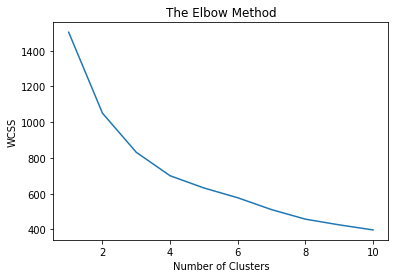

In [6]:
# Using elbow method to find optimal number of cluster
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

## Using the Dendrogram Method

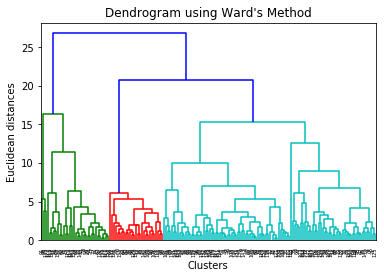

In [7]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram using Ward's Method")
plt.xlabel('Clusters')
plt.ylabel('Euclidean distances')
plt.show()

# By using the above Methods we see that the optimal clustering number is 3

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

## Now we shall visualize this data

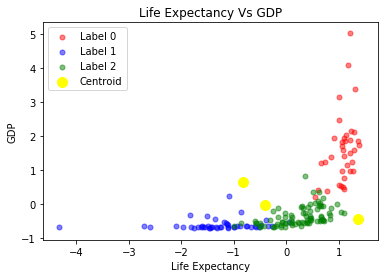

In [11]:
plt.scatter(X[y_kmeans == 0, 6], X[y_kmeans == 0, 8],
            s = 25, c = 'red', label = 'Label 0', alpha = 0.5)
plt.scatter(X[y_kmeans == 1, 6], X[y_kmeans == 1, 8],
            s = 25, c = 'blue', label = 'Label 1', alpha = 0.5)
plt.scatter(X[y_kmeans == 2, 6], X[y_kmeans == 2, 8],
            s = 25, c = 'green', label = 'Label 2', alpha = 0.5)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 100, c = 'Yellow', label = 'Centroid')

plt.title("Life Expectancy Vs GDP")
plt.xlabel("Life Expectancy")
plt.ylabel("GDP")
plt.legend()
plt.show()

## From the various graphs we have plotted, we see that the countries classified under label 0 needs most help followed by label 2. Label 1 countries seem to be doing well on their on their own and do not require any assistance

In [12]:
prior_1 = []
prior_2 = []
prior_3 = []
for i in range(167):
    if y_kmeans[i] == 1:
        prior_1.append(dataset.iloc[i, 0])
    elif y_kmeans[i] == 2:
        prior_2.append(dataset.iloc[i, 0])
    else:
        prior_3.append(dataset.iloc[i, 0])